<a href="https://colab.research.google.com/github/SACHINBALHARA/Data-science-projects/blob/Deep-Learning-models/Churn_modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARTIFICIAL NEURAL NETWORK

# import libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

# Part 1 -- Data preprocessing

# load the dataset

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# convert the into train and test set
X=data.iloc[:,3:-1].values
y=data.iloc[:,-1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


# Encoding categorical Data

encode gender column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:, 2]=le.fit_transform(X[:,2])

one hot encode the geography column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


splitting the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

# part 2-- Building the ANN

# initializing the ann

In [ ]:
import numpy as np
import tensorflow as tf
import keras

In [ ]:
ann=tf.keras.models.Sequential()

# adding the input layer and first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

# add second layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

# adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Part3 - training the ANN

# compiling the ann

In [ ]:
ann.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

training the ann

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.7796
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4630 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8014
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.8144
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8154
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8199
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8224
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8289
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3940 - accuracy: 0.8311
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3894 - accura

# Part 4 -- making the prediction

In [ ]:
print(ann.predict([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))

1/1 [==============================] - 0s 65ms/step
[[1.]]


# predict the test set result

In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 5ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# making the confusion matrix

[[1579   16]
 [ 322   83]]


<Axes: >

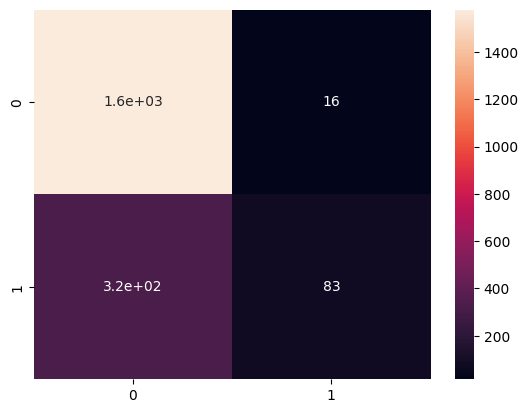

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
sns.heatmap(cm,annot=True)